# Libraries

In [4]:
from cdasws import CdasWs
import pandas as pd
import numpy as np
from spacepy import pycdf
import matplotlib as plt
from dtw import *
cdas = CdasWs()
plt.rcParams["figure.figsize"] = [20, 10]

# Step 1 - Loading Datasets: DSCOVER, WIND, WIND SWE

In [5]:
vars_wind = ['BF1','BGSM','BGSE']
time = ['2022-09-17T20:59:59.000Z', '2022-09-17T22:59:59.000Z']
status_wind, data_wind = cdas.get_data('WI_H2_MFI', vars_wind, time[0], time[1])

In [6]:
vars_dscovr = ['B1F1','B1SDF1','B1GSE','B1SDGSE','B1RTN','B1SDRTN']
dscovr_values = 'BF1','BGSM','BGSE'
time = ['2022-09-17T21:59:59.000Z', '2022-09-17T23:59:59.000Z']
status_dscovr, data_dscovr = cdas.get_data('DSCOVR_H0_MAG', vars_dscovr, time[0], time[1])

In [7]:
vars_wind_swe = ['fit_flag','year','doy','Proton_V_nonlin','Proton_V_nonlin_errorbars','Proton_sigmaV_nonlin','Proton_VX_nonlin','Proton_VX_nonlin_errorbars','Proton_sigmaVX_nonlin','Proton_VY_nonlin','Proton_VY_nonlin_errorbars','Proton_sigmaVY_nonlin','Proton_VZ_nonlin','Proton_VZ_nonlin_errorbars','Proton_sigmaVZ_nonlin','Proton_W_nonlin','Proton_W_nonlin_errorbars','Proton_sigmaW_nonlin','Proton_Wperp_nonlin','Proton_Wperp_nonlin_errorbars','Proton_sigmaWperp_nonlin','Proton_Wpar_nonlin','Proton_Wpar_nonlin_errorbars','Proton_sigmaWpar_nonlin','EW_flowangle','EW_flowangle_errorbars','SigmaEW_flowangle','NS_flowangle','NS_flowangle_errorbars','SigmaNS_flowangle','Proton_Np_nonlin','Proton_Np_nonlin_log','Proton_Np_nonlin_errorbars','Proton_sigmaNp_nonlin','Alpha_V_nonlin','Alpha_V_nonlin_errorbars','Alpha_sigmaV_nonlin','Alpha_VX_nonlin','Alpha_VX_nonlin_errorbars','Alpha_sigmaVX_nonlin','Alpha_VY_nonlin','Alpha_VY_nonlin_errorbars','Alpha_sigmaVY_nonlin','Alpha_VZ_nonlin','Alpha_VZ_nonlin_errorbars','Alpha_sigmaVZ_nonlin','Alpha_W_nonlin','Alpha_W_nonlin_errorbars','Alpha_sigmaW_nonlin','Alpha_Wperp_nonlin','Alpha_Wperp_nonlin_errorbars','Alpha_sigmaWperp_nonlin','Alpha_Wpar_nonlin','Alpha_Wpar_nonlin_errorbars','Alpha_sigmaWpar_nonlin','Alpha_Na_nonlin','Alpha_Na_nonlin_log','Alpha_Na_nonlin_errorbars','Alpha_sigmaNa_nonlin','ChisQ_DOF_nonlin','Peak_doy','sigmaPeak_doy','Proton_V_moment','Proton_VX_moment','Proton_VY_moment','Proton_VZ_moment','Proton_W_moment','Proton_Wperp_moment','Proton_Wpar_moment','Proton_Np_moment','Proton_Np_moment_log','BX','BY','BZ','Ang_dev','dev','xgse','ygse','zgse','ygsm','zgsm']
time = ['2022-08-25T21:58:45.000Z', '2022-08-25T23:58:45.000Z']
status, data_wind_swe = cdas.get_data('WI_H1_SWE', vars_wind_swe, time[0], time[1])

In [8]:
wind_swe_values = 'Proton_V_moment','Proton_W_moment','Proton_Np_moment','Epoch'
wind_swe = pd.DataFrame.from_dict(data_wind_swe[wind_swe_values])
wind_swe['Epoch'] = pd.to_datetime(wind_swe.Epoch)
wind_swe.set_index('Epoch', inplace = True)

wind_values = 'BF1','Epoch'
wind = pd.DataFrame.from_dict(data_wind[wind_values])
wind['Epoch'] = pd.to_datetime(wind.Epoch)
wind.set_index('Epoch', inplace = True)

dscovr_values = 'B1F1','Epoch1'
dscovr = pd.DataFrame.from_dict(data_dscovr[dscovr_values])
dscovr['Epoch1'] = pd.to_datetime(dscovr.Epoch1)
dscovr.set_index('Epoch1', inplace = True)
dscovr.replace(-1.000000e+31, dscovr['B1F1'].median(), inplace=True)

In [10]:
wind_swe.reset_index().head()

,Epoch,Proton_V_moment,Proton_W_moment,Proton_Np_moment
0,2022-08-25 22:00:05.625,349.457367,29.699356,4.292340
1,2022-08-25 22:01:45.945,347.184937,30.917871,4.571673
2,2022-08-25 22:03:26.266,348.139465,29.777538,4.379379
3,2022-08-25 22:05:06.587,348.406830,29.673004,4.383018
4,2022-08-25 22:06:46.908,347.868561,29.609287,4.394022


<AxesSubplot:xlabel='Epoch'>

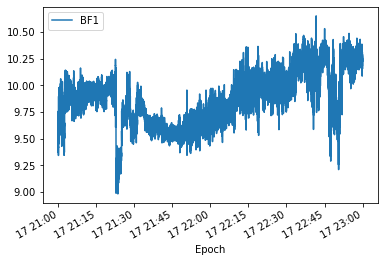

In [15]:
wind.plot()

<AxesSubplot:xlabel='Epoch1'>

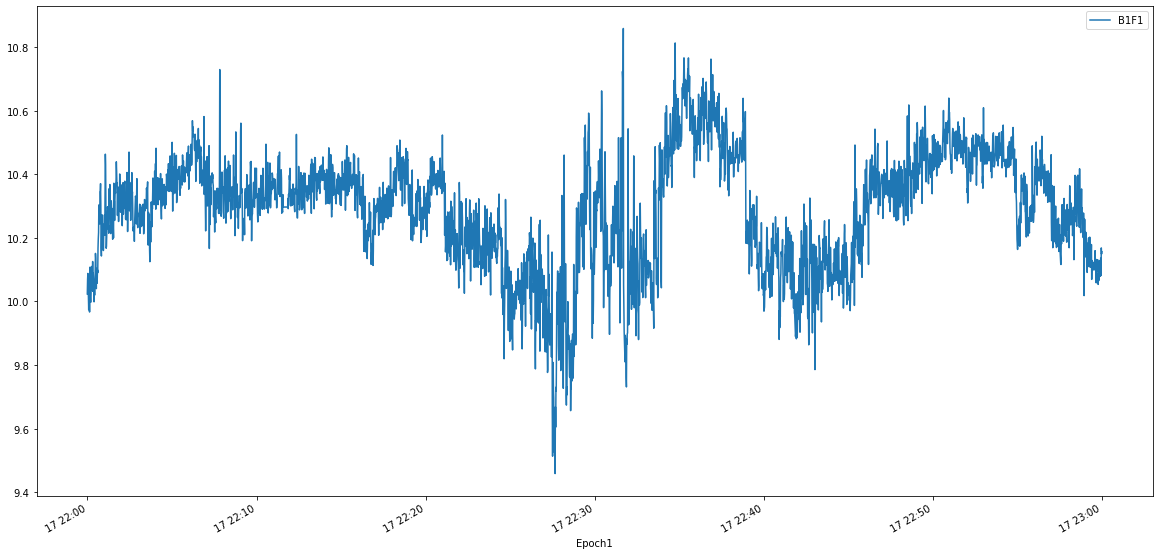

In [26]:
dscovr.plot()

# Step 2 - Dynamic Time Warping DSCOVR - WIND Unifying dataset

In [66]:
alignment = dtw(dscovr['2022-09-17 22:30:59.000':'2022-09-17 23:25:59.000'], wind['2022-09-17 22:15:59.000':'2022-09-17 22:20:59.000'], keep_internals=True)

KeyError: 0

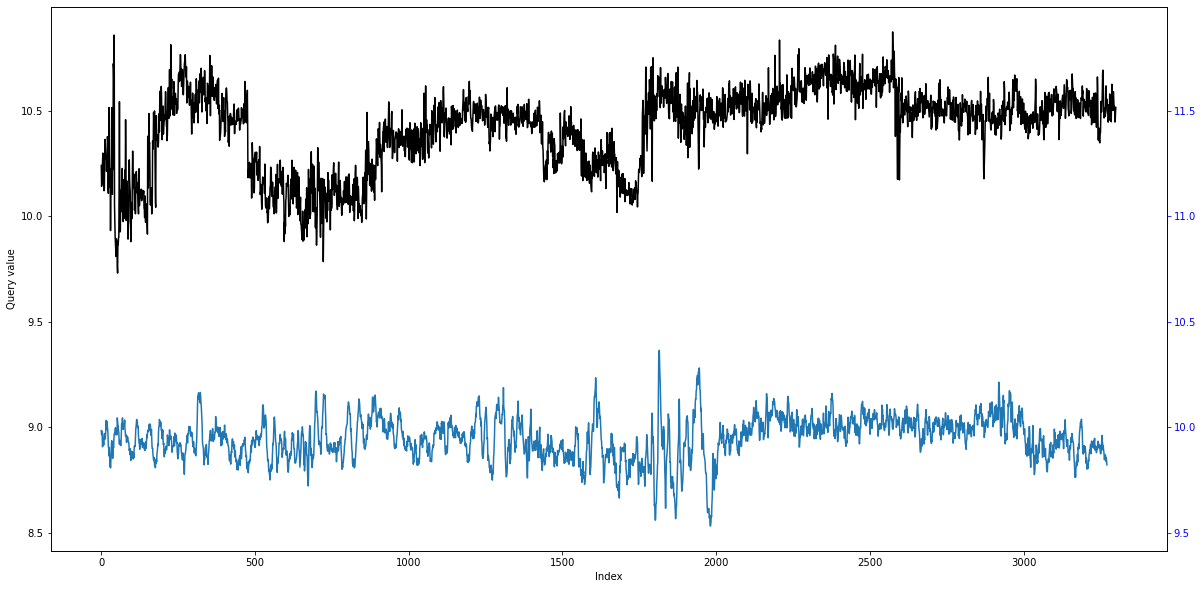

In [76]:
alignment.plot(type="twoway",offset=-1)

In [54]:
dtw(dscovr['2022-09-17 22:30:59.000':'2022-09-17 23:25:59.000'], wind['2022-09-17 22:15:59.000':'2022-09-17 22:20:59.000'], keep_internals=True, window_type="sakoechiba", window_args={'window_size':2},
    step_pattern=symmetricP1).plot(type="twoway",offset=-2)
plt.show()

ValueError: No warping path found compatible with the local constraints

In [55]:
help(dtw)

Help on function dtw in module dtw.dtw:

dtw(x, y=None, dist_method='euclidean', step_pattern='symmetric2', window_type=None, window_args={}, keep_internals=False, distance_only=False, open_end=False, open_begin=False)
    Compute Dynamic Time Warp and find optimal alignment between two time
    series.
    
    **Details**
    
    The function performs Dynamic Time Warp (DTW) and computes the optimal
    alignment between two time series ``x`` and ``y``, given as numeric
    vectors. The “optimal” alignment minimizes the sum of distances between
    aligned elements. Lengths of ``x`` and ``y`` may differ.
    
    The local distance between elements of ``x`` (query) and ``y``
    (reference) can be computed in one of the following ways:
    
    1. if ``dist_method`` is a string, ``x`` and ``y`` are passed to the
       `scipy.spatial.distance.cdist` function with the method given;
    2. multivariate time series and arbitrary distance metrics can be
       handled by supplying a loc

# Step 3 - Selecting Wind Ion Parameters for Unified Dataset

# Step 4 - Prepare DSCOVR spectra data

# Step 5 - Train neural network from DSCVOR data